In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

import time
import pickle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.base import clone
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:

# Training set
X_train = np.load('/content/drive/MyDrive/Gr3_Fabric_Classification/data/image_extraction/vgg16_extraction/train/features.npy')
y_train = np.load('/content/drive/MyDrive/Gr3_Fabric_Classification/data/image_extraction/vgg16_extraction/train/train_labels.npy')

# Validation set
X_val = np.load('/content/drive/MyDrive/Gr3_Fabric_Classification/data/image_extraction/vgg16_extraction/validation/features.npy')
y_val = np.load('/content/drive/MyDrive/Gr3_Fabric_Classification/data/image_extraction/vgg16_extraction/validation/labels.npy')

# Testing set
X_test = np.load('/content/drive/MyDrive/Gr3_Fabric_Classification/data/image_extraction/vgg16_extraction/test/features.npy')
y_test = np.load('/content/drive/MyDrive/Gr3_Fabric_Classification/data/image_extraction/vgg16_extraction/test/labels.npy')


In [4]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")




X_train shape: (9030, 7, 7, 512)
y_train shape: (9030, 6)
X_val shape: (2256, 7, 7, 512)
y_val shape: (2256, 6)
X_test shape: (939, 7, 7, 512)
y_test shape: (939, 6)


In [5]:
# Reshape
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

In [6]:
X_train_reshaped.shape

(9030, 25088)

In [7]:
from sklearn.preprocessing import Normalizer

# Sử dụng Normalizer
normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train_reshaped)
X_val_normalized = normalizer.transform(X_val_reshaped)
X_test_normalized = normalizer.transform(X_test_reshaped)


In [8]:
X_train = X_train_normalized
X_val = X_val_normalized
X_test = X_test_normalized

In [9]:
y_train = np.argmax(y_train, axis=1)
y_val = np.argmax(y_val, axis=1)
y_test = np.argmax(y_test, axis=1)

In [10]:
y_train.shape

(9030,)

In [11]:

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_val_pca shape: {X_val_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

X_train_pca shape: (9030, 2490)
X_val_pca shape: (2256, 2490)
X_test_pca shape: (939, 2490)


In [12]:
X_train = X_train_pca
X_val = X_val_pca
X_test = X_test_pca

<ipython-input-13-b293cfbf56f6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_labels, palette='pastel', order=label_mapping.values())
<ipython-input-13-b293cfbf56f6>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_val_labels, palette='pastel', order=label_mapping.values())


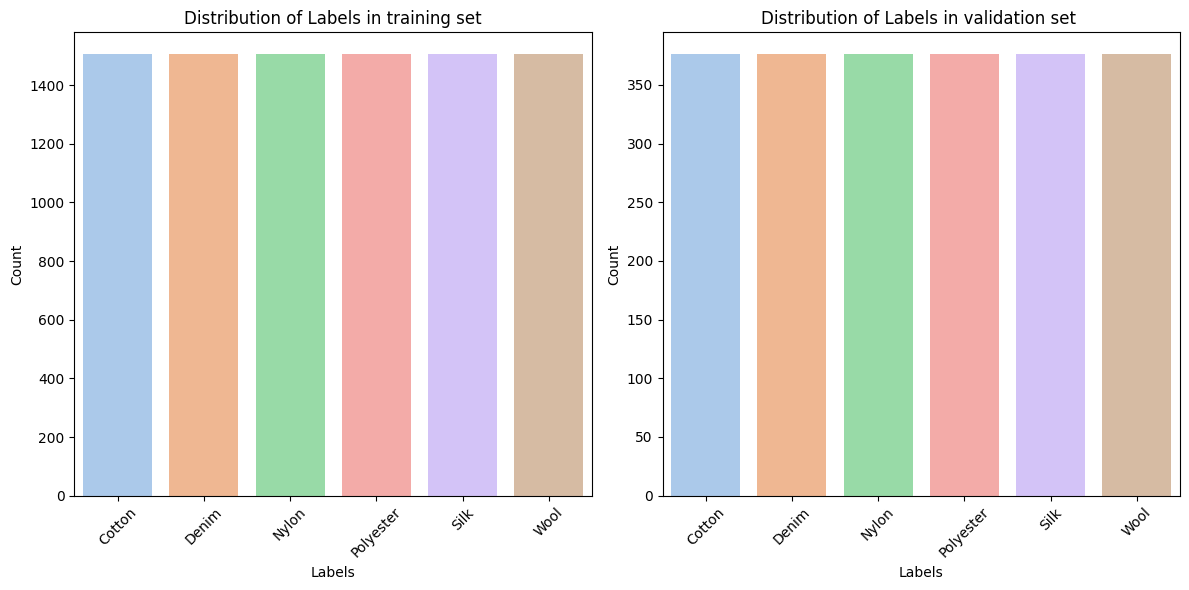

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

label_mapping = {0: 'Cotton', 1: 'Denim', 2: 'Nylon', 3: 'Polyester', 4: 'Silk', 5: 'Wool'}

y_train_labels = [label_mapping[label] for label in y_train]
y_val_labels = [label_mapping[label] for label in y_val]

plt.figure(figsize=(12, 6))

# Biểu đồ cho y_train
plt.subplot(1, 2, 1)
sns.countplot(x=y_train_labels, palette='pastel', order=label_mapping.values())
plt.title('Distribution of Labels in training set')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Biểu đồ cho y_val
plt.subplot(1, 2, 2)
sns.countplot(x=y_val_labels, palette='pastel', order=label_mapping.values())
plt.title('Distribution of Labels in validation set ')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [14]:
print(f'+ x_shape: {X_train.shape}, y_shape: {y_train.shape}')
print(f'+ Input:\n{X_train[:20, :]}')
print(f'+ Output:\n{y_train[:20]}')

+ x_shape: (9030, 2490), y_shape: (9030,)
+ Input:
[[ 2.6719809e-01 -1.5261841e-01  2.6141635e-01 ...  9.2083734e-04
   1.3989500e-03 -2.5567166e-03]
 [-4.2875695e-01  1.0832833e-02  5.0463200e-02 ... -5.5088894e-03
   1.6716263e-03  1.1340692e-02]
 [ 3.6352307e-01  1.6567527e-01  1.6942783e-01 ...  3.9927671e-03
   4.1268030e-03  1.6964201e-03]
 ...
 [-7.8895412e-02 -6.5109819e-02  1.2804557e-01 ...  1.6908684e-03
   4.0164432e-03 -2.6066203e-04]
 [ 3.5585171e-01  3.1598207e-01  6.7038022e-02 ...  2.3476376e-04
   2.2343872e-03  1.8013775e-04]
 [ 2.7324218e-01 -7.2480470e-02 -1.3481273e-01 ...  3.9935932e-03
   8.7396540e-05 -3.8035875e-03]]
+ Output:
[1 5 3 4 3 2 1 3 4 3 1 1 2 4 5 0 3 1 4 0]


In [15]:
params = {
    "random_state": 42,
}


In [17]:
print(np.isnan(X_train).any())  # Kiểm tra NaN
print(np.isinf(X_train).any())  # Kiểm tra vô cực


False
False


In [20]:
import os
import time
import numpy as np
import pickle
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.base import clone
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

models = {
    "XGBoost": xgb.XGBClassifier(random_state=params["random_state"]),
    "LightGBM": lgb.LGBMClassifier(random_state=params["random_state"]),
    "Random Forest": RandomForestClassifier(random_state=params["random_state"]),
    "AdaBoost": AdaBoostClassifier(random_state=params["random_state"]),
    "MLP": MLPClassifier(random_state=params["random_state"]),
    "SVM": SVC(probability=True, random_state=params["random_state"]),
    "CART (Decision Trees)": DecisionTreeClassifier(random_state=params["random_state"]),
    "Logistic Regression": LogisticRegression(random_state=params["random_state"]),
    "LDA": LinearDiscriminantAnalysis(solver='lsqr'),
    'kNN': KNeighborsClassifier(),
}

base_path = '/content/drive/MyDrive/Gr3_Fabric_Classification/models/save_models/model_1_pca'
os.makedirs(base_path, exist_ok=True)

all_results = {}

def run_and_save_model(model_name, model, X_train, y_train, X_val, y_val, params):

    model_results = {'accuracy': None, 'f1': None, 'precision': None, 'recall': None, 'auc': None}

    print(f'Model [{model_name}]:')

    start_time = time.time()

    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)  # Dự đoán xác suất cho AUC

    # Tính toán metrics: accuracy, f1-score, precision, recall
    model_results['accuracy'] = accuracy_score(y_val, y_val_pred)
    model_results['f1'] = f1_score(y_val, y_val_pred, average='weighted')
    model_results['precision'] = precision_score(y_val, y_val_pred, average='weighted')
    model_results['recall'] = recall_score(y_val, y_val_pred, average='weighted')
    model_results['auc'] = roc_auc_score(y_val, y_val_prob, multi_class='ovr')

    # Lưu mô hình huấn luyện lại vào file
    model_full_train_path = os.path.join(base_path, f'{model_name}_model_full_train.pkl')
    with open(model_full_train_path, 'wb') as model_full_train_file:
        pickle.dump(model, model_full_train_file)

    # Lưu kết quả vào all_results
    all_results[model_name] = model_results

    # Hiển thị kết quả metrics
    print(f'+ Accuracy: {model_results["accuracy"]:.4f}')
    print(f'+ F1 Score: {model_results["f1"]:.4f}')
    print(f'+ Precision: {model_results["precision"]:.4f}')
    print(f'+ Recall: {model_results["recall"]:.4f}')
    print(f'+ AUC: {model_results["auc"]:.4f}')

    # Hiển thị thời gian hoàn thành
    elapsed_time = time.time() - start_time
    print(f'+ Time taken for {model_name}: {elapsed_time:.4f} seconds')

# Lặp qua từng mô hình
for model_name, model in models.items():
    run_and_save_model(model_name, model, X_train, y_train, X_val, y_val, params)

# Lưu tất cả kết quả vào một file
results_path = os.path.join(base_path, 'all_models_results.pkl')
with open(results_path, 'wb') as result_file:
    pickle.dump(all_results, result_file)

print("All models results saved to:", results_path)


Model [XGBoost]:
+ Accuracy: 0.7695
+ F1 Score: 0.7680
+ Precision: 0.7691
+ Recall: 0.7695
+ AUC: 0.9591
+ Time taken for XGBoost: 150.6468 seconds
Model [LightGBM]:
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.144463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 634950
[LightGBM] [Info] Number of data points in the train set: 9030, number of used features: 2490
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
+ Accuracy: 0.7637
+ F1 Score: 0.7618
+ Precision: 0.7623
+ Recall: 0.7637
+ AUC: 0.9571
+ Time taken for LightGBM: 65.0102 seconds
Model [Random Forest]:
+ Accuracy: 0.6068
+ F1 Score: 0.5989
+ Precision: 0.5994
+ Re

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


+ Accuracy: 0.4428
+ F1 Score: 0.4356
+ Precision: 0.4396
+ Recall: 0.4428
+ AUC: 0.7512
+ Time taken for AdaBoost: 154.5127 seconds
Model [MLP]:
+ Accuracy: 0.8112
+ F1 Score: 0.8099
+ Precision: 0.8098
+ Recall: 0.8112
+ AUC: 0.9688
+ Time taken for MLP: 38.2250 seconds
Model [SVM]:
+ Accuracy: 0.8502
+ F1 Score: 0.8484
+ Precision: 0.8487
+ Recall: 0.8502
+ AUC: 0.9789
+ Time taken for SVM: 531.7809 seconds
Model [CART (Decision Trees)]:
+ Accuracy: 0.5168
+ F1 Score: 0.5152
+ Precision: 0.5145
+ Recall: 0.5168
+ AUC: 0.7101
+ Time taken for CART (Decision Trees): 33.8217 seconds
Model [Logistic Regression]:
+ Accuracy: 0.7912
+ F1 Score: 0.7891
+ Precision: 0.7895
+ Recall: 0.7912
+ AUC: 0.9620
+ Time taken for Logistic Regression: 22.1294 seconds
Model [LDA]:
+ Accuracy: 0.8249
+ F1 Score: 0.8257
+ Precision: 0.8271
+ Recall: 0.8249
+ AUC: 0.9705
+ Time taken for LDA: 3.1910 seconds
Model [kNN]:
+ Accuracy: 0.7491
+ F1 Score: 0.7468
+ Precision: 0.7507
+ Recall: 0.7491
+ AUC: 0.93

In [21]:
df_results = pd.DataFrame.from_dict(all_results, orient='index')

df_results

,accuracy,f1,precision,recall,auc
XGBoost,0.769504,0.767962,0.769140,0.769504,0.959067
LightGBM,0.763741,0.761779,0.762273,0.763741,0.957079
Random Forest,0.606826,0.598864,0.599408,0.606826,0.875835
AdaBoost,0.442819,0.435596,0.439617,0.442819,0.751237
MLP,0.811170,0.809912,0.809798,0.811170,0.968827
SVM,0.850177,0.848432,0.848692,0.850177,0.978933
CART (Decision Trees),0.516844,0.515229,0.514505,0.516844,0.710106
Logistic Regression,0.791223,0.789100,0.789504,0.791223,0.962015
LDA,0.824911,0.825727,0.827056,0.824911,0.970521
kNN,0.749113,0.746816,0.750716,0.749113,0.938423


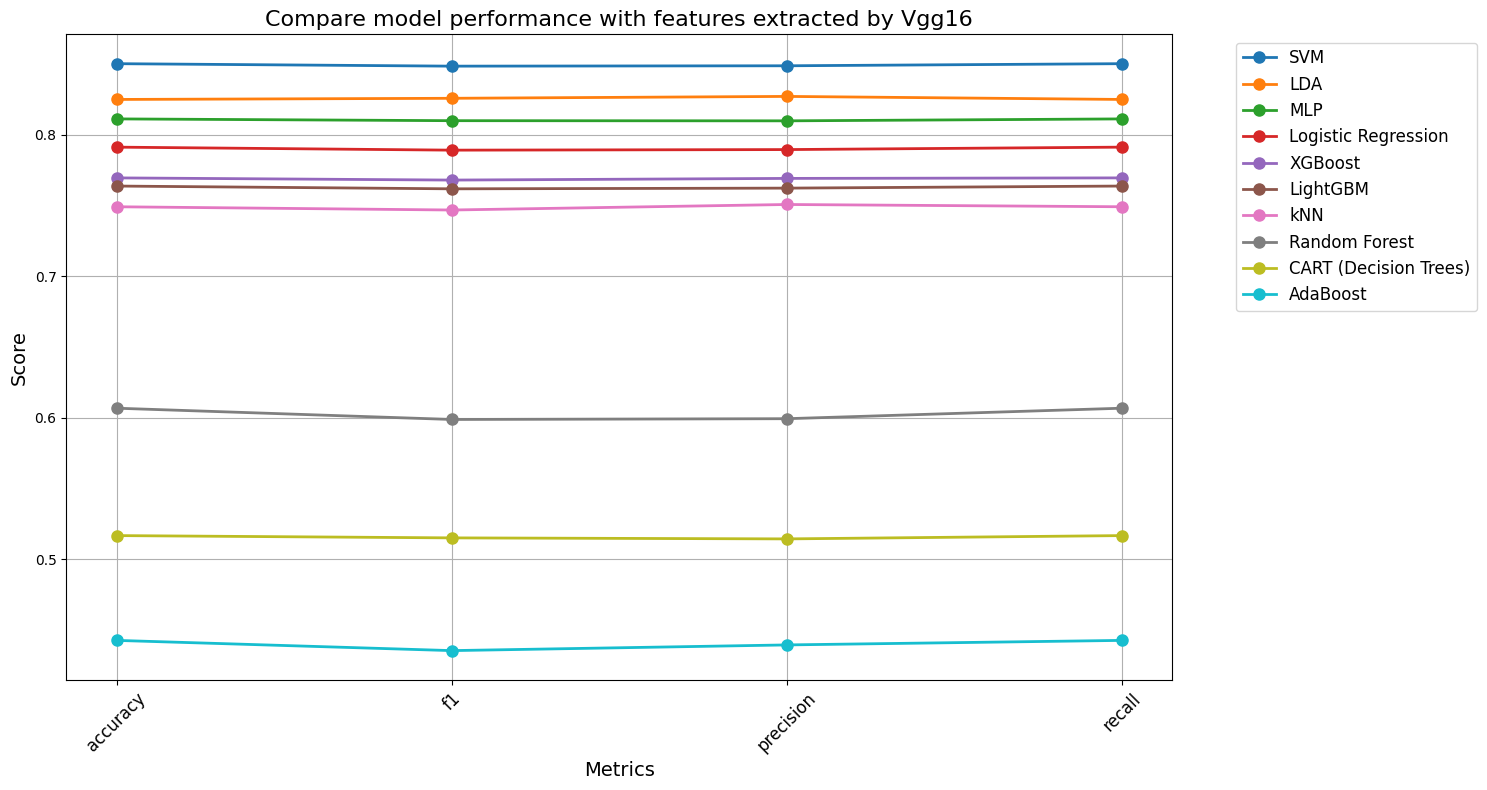

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả định df_results đã tồn tại và chứa các giá trị cho các metrics đã chỉ định
metrics = ['accuracy', 'f1', 'precision', 'recall']

# Tính toán điểm số trung bình cho mỗi model
df_results['average'] = df_results[metrics].mean(axis=1)

# Sắp xếp các model theo điểm số trung bình từ cao đến thấp
sorted_models = df_results.sort_values(by='average', ascending=False).index

# Tăng kích thước của biểu đồ
plt.figure(figsize=(15, 8))

# Vẽ từng model với các thông số theo thứ tự đã sắp xếp
for model_name in sorted_models:
    plt.plot(metrics, df_results.loc[model_name][metrics], marker='o', label=model_name, linewidth=2, markersize=8)

# Tăng kích thước nhãn và tiêu đề
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Compare model performance with features extracted by Vgg16', fontsize=16)

# Đặt legend ra ngoài vùng vẽ
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Bật lưới để dễ theo dõi
plt.grid(True)

# Xoay nhãn trục x nếu cần
plt.xticks(rotation=45, fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh tự động để không bị cắt bớt nội dung
plt.show()


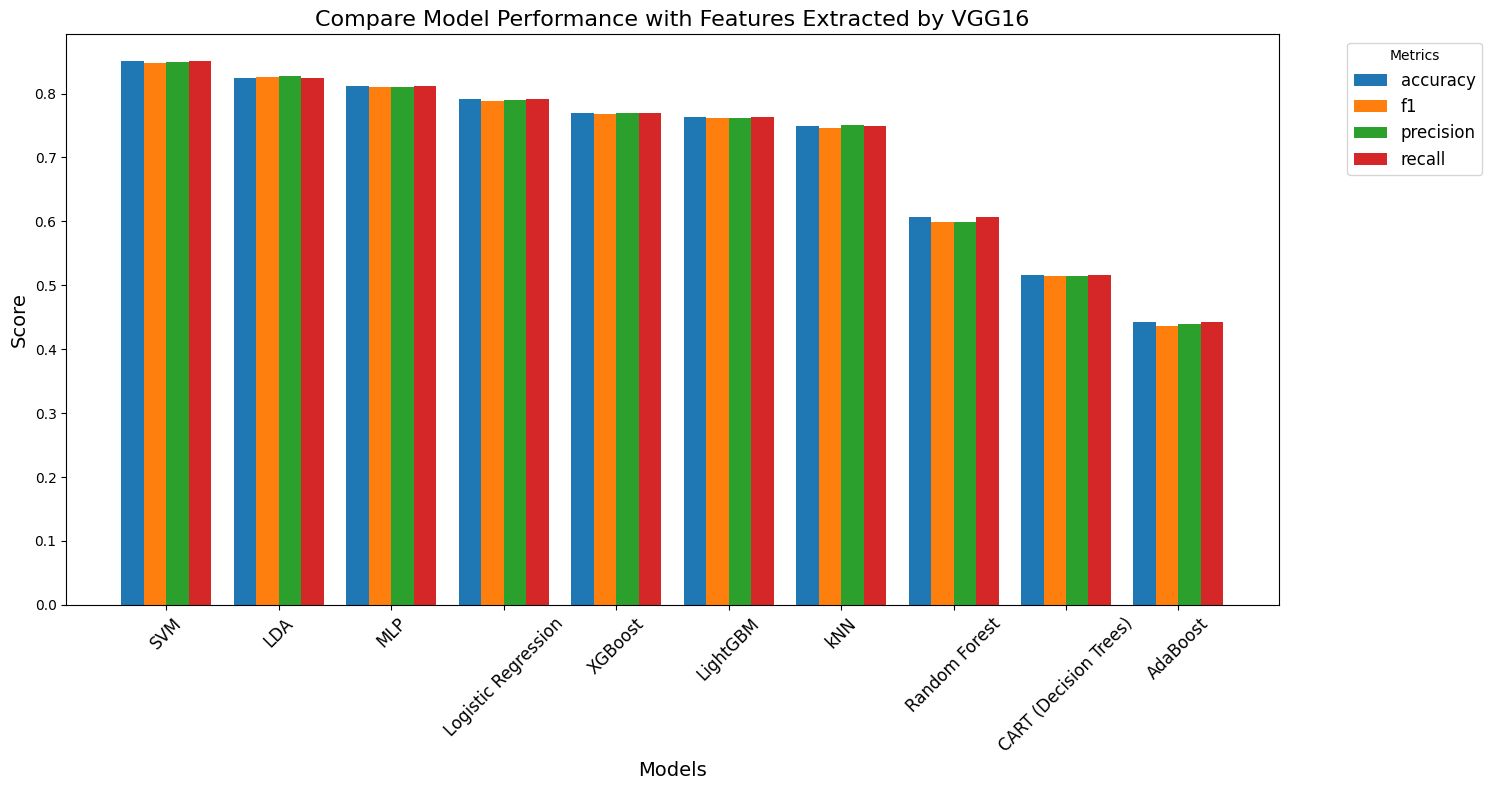

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Loại bỏ AUC khỏi danh sách metrics
metrics = ['accuracy', 'f1', 'precision', 'recall']  # Bỏ 'auc'

# Tạo màu sắc đậm cho từng metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Các mã màu đậm

# Tính toán điểm số trung bình cho mỗi model
df_results['average'] = df_results[metrics].mean(axis=1)

# Sắp xếp các model theo điểm số trung bình từ cao đến thấp
df_results_sorted = df_results.sort_values(by='average', ascending=False)

# Số lượng models và metrics
n_models = len(df_results_sorted.index)
n_metrics = len(metrics)

# Tạo khoảng cách trên trục x cho mỗi mô hình
x = np.arange(n_models)

# Độ rộng của mỗi cột trong một cụm (chia nhỏ cho các metrics trong mỗi model)
bar_width = 0.2

# Tăng kích thước của biểu đồ
plt.figure(figsize=(15, 8))

# Vẽ cột cho từng metric
for i, (metric, color) in enumerate(zip(metrics, colors)):
    # Tạo vị trí cho cột của metric thứ i, dịch chuyển cụm cột theo bar_width
    plt.bar(x + i * bar_width, df_results_sorted[metric], bar_width, label=metric, color=color)

# Đặt tên cho trục x và y
plt.xlabel('Models', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Compare Model Performance with Features Extracted by VGG16', fontsize=16)

# Đặt nhãn cho trục x (mỗi nhãn là một model)
plt.xticks(x + bar_width * (n_metrics-1) / 2, df_results_sorted.index, fontsize=12, rotation=45)

# Hiển thị legend ra ngoài đồ thị
plt.legend(title="Metrics", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Điều chỉnh layout để không bị tràn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [24]:
import os
import joblib  # Hoặc sử dụng pickle nếu bạn đã sử dụng pickle để lưu mô hình

# Đường dẫn đến thư mục chứa các mô hình
model_folder = '/content/drive/MyDrive/Gr3_Fabric_Classification/models/save_models/model_1_pca/'

# Tạo một danh sách để lưu các mô hình
models = {}

# Duyệt qua tất cả các tệp trong thư mục
for filename in os.listdir(model_folder):
    # Kiểm tra xem tệp có đuôi .pkl không
    if filename.endswith('_model_full_train.pkl'):
        # Tạo đường dẫn đầy đủ đến tệp
        file_path = os.path.join(model_folder, filename)
        # Tải mô hình và lưu vào từ điển
        models[filename] = joblib.load(file_path)  # Hoặc sử dụng pickle.load(file_path) nếu cần

# Kiểm tra kết quả
for model_name, model in models.items():
    print(f'Model name: {model_name}, Model type: {type(model)}')


Model name: XGBoost_model_full_train.pkl, Model type: <class 'xgboost.sklearn.XGBClassifier'>
Model name: LightGBM_model_full_train.pkl, Model type: <class 'lightgbm.sklearn.LGBMClassifier'>
Model name: Random Forest_model_full_train.pkl, Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Model name: AdaBoost_model_full_train.pkl, Model type: <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
Model name: MLP_model_full_train.pkl, Model type: <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
Model name: SVM_model_full_train.pkl, Model type: <class 'sklearn.svm._classes.SVC'>
Model name: CART (Decision Trees)_model_full_train.pkl, Model type: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Model name: Logistic Regression_model_full_train.pkl, Model type: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Model name: LDA_model_full_train.pkl, Model type: <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
Mo

In [25]:
y_val

array([4, 4, 3, ..., 3, 3, 2])

Baseline [XGBoost_model_full_train.pkl]
+ Accuracy = 0.770
+ Precision = 0.769
+ Recall = 0.770
+ F1-score = 0.768
+ AUC = 0.959



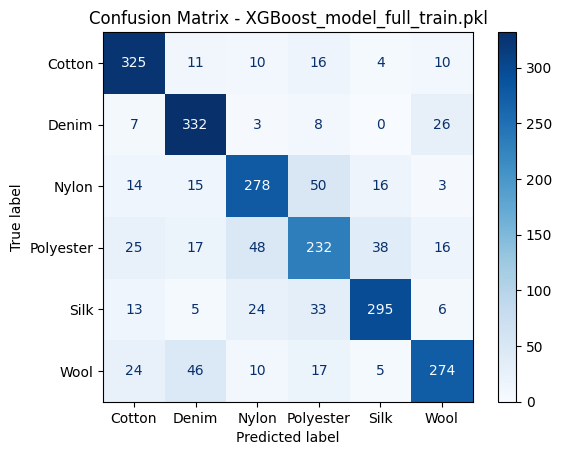

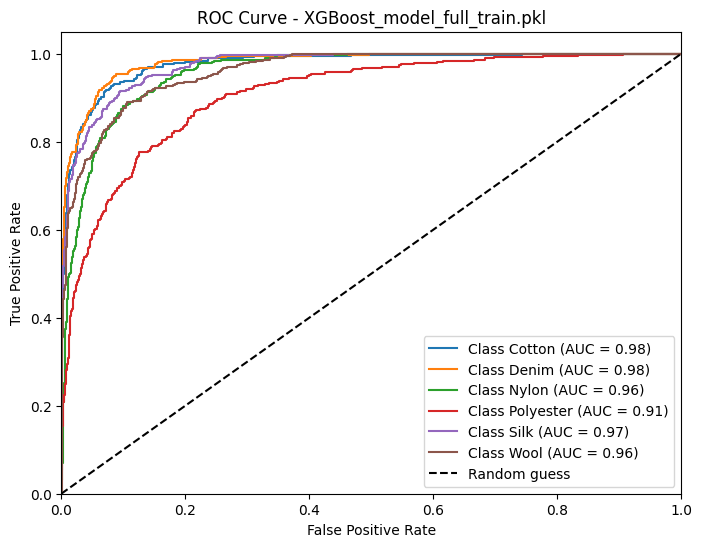

Baseline [LightGBM_model_full_train.pkl]
+ Accuracy = 0.764
+ Precision = 0.762
+ Recall = 0.764
+ F1-score = 0.762
+ AUC = 0.957



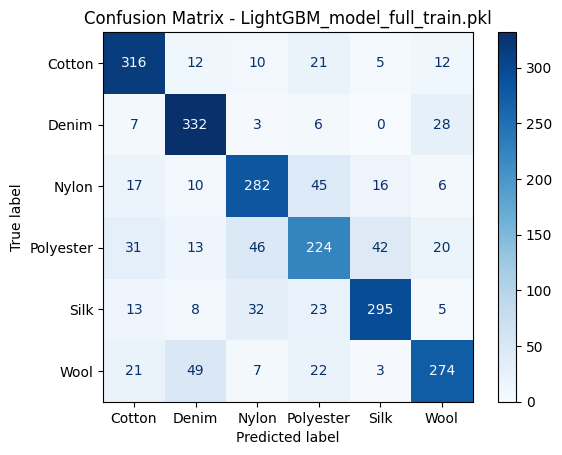

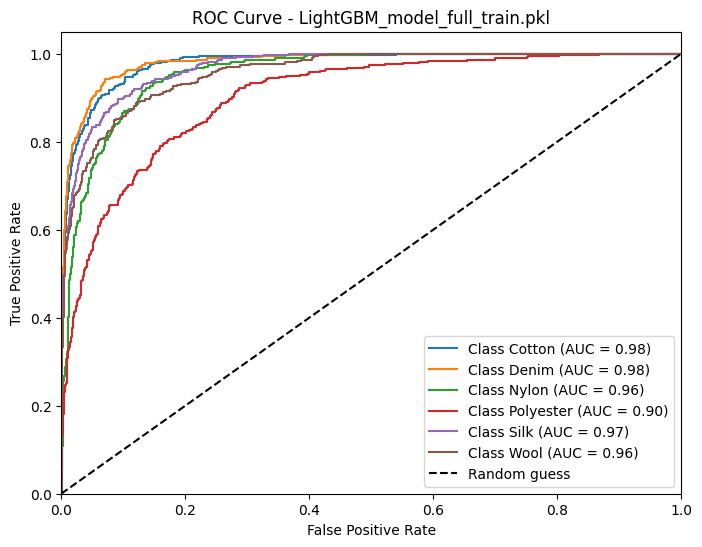

Baseline [Random Forest_model_full_train.pkl]
+ Accuracy = 0.607
+ Precision = 0.599
+ Recall = 0.607
+ F1-score = 0.599
+ AUC = 0.876



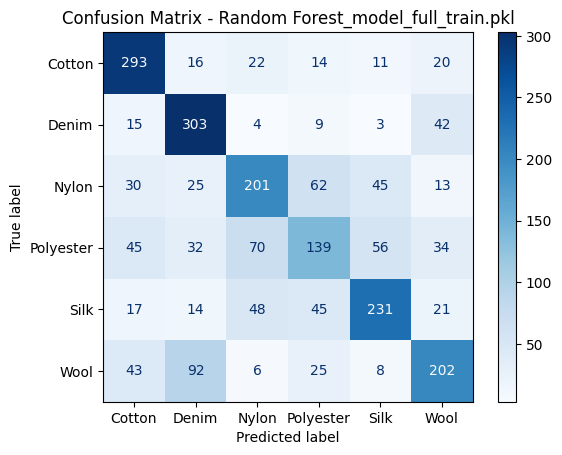

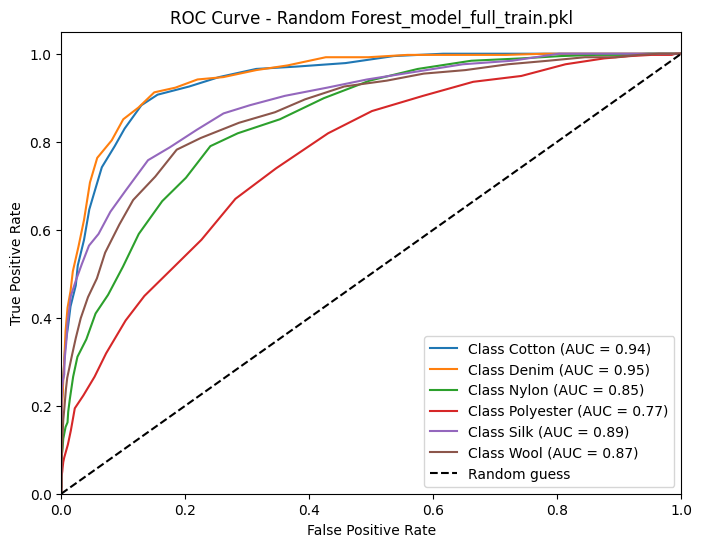

Baseline [AdaBoost_model_full_train.pkl]
+ Accuracy = 0.443
+ Precision = 0.440
+ Recall = 0.443
+ F1-score = 0.436
+ AUC = 0.751



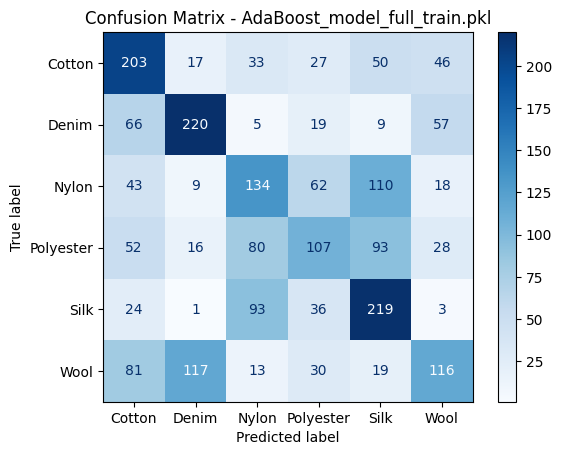

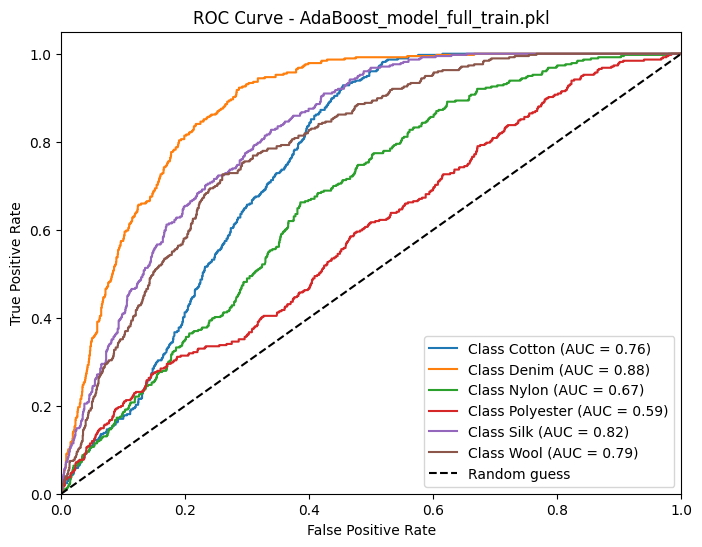

Baseline [MLP_model_full_train.pkl]
+ Accuracy = 0.811
+ Precision = 0.810
+ Recall = 0.811
+ F1-score = 0.810
+ AUC = 0.969



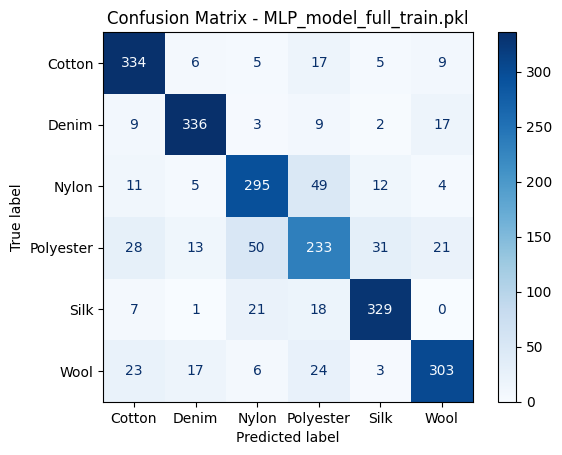

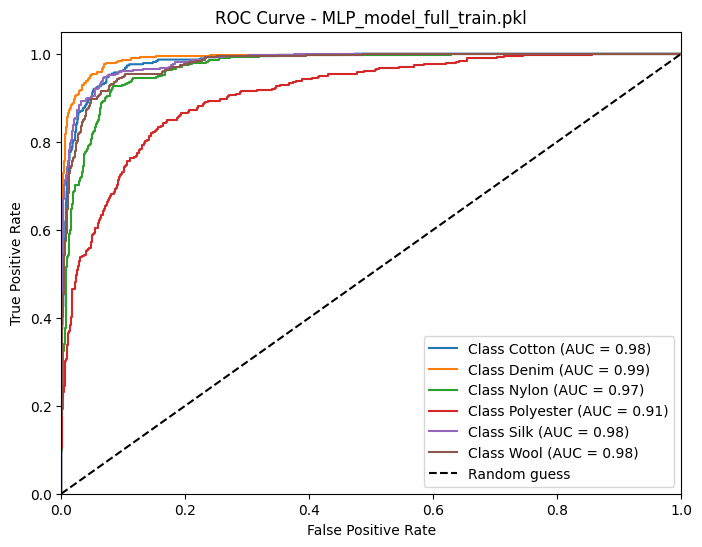

Baseline [SVM_model_full_train.pkl]
+ Accuracy = 0.850
+ Precision = 0.849
+ Recall = 0.850
+ F1-score = 0.848
+ AUC = 0.979



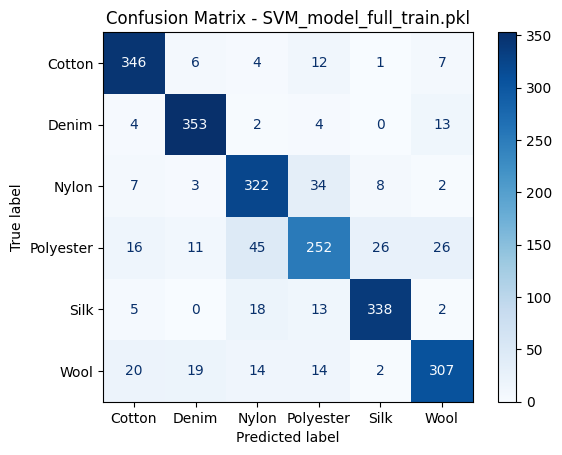

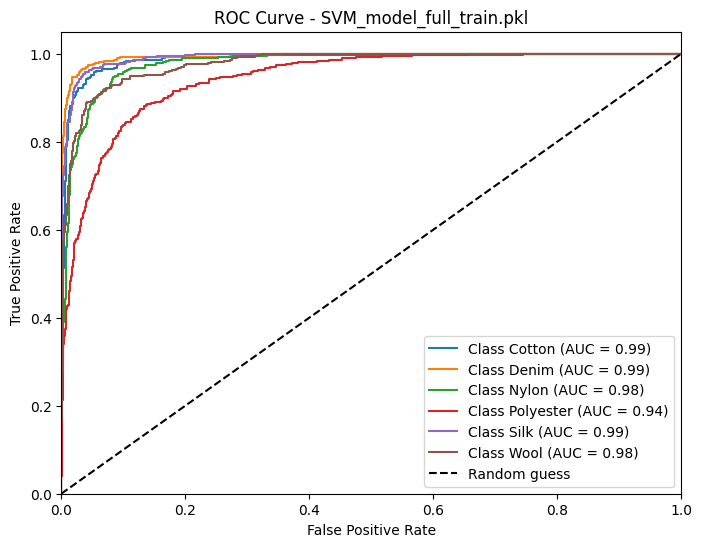

Baseline [CART (Decision Trees)_model_full_train.pkl]
+ Accuracy = 0.517
+ Precision = 0.515
+ Recall = 0.517
+ F1-score = 0.515
+ AUC = 0.710



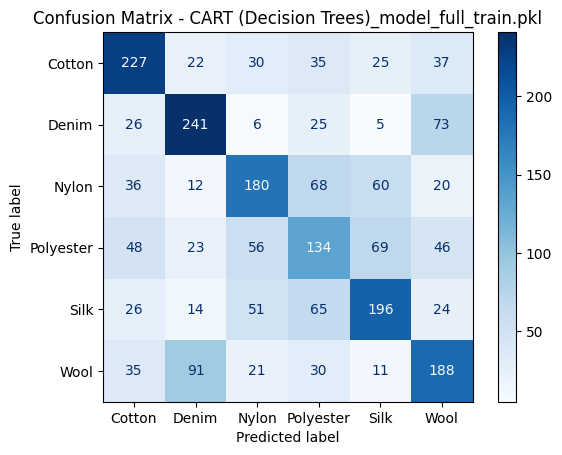

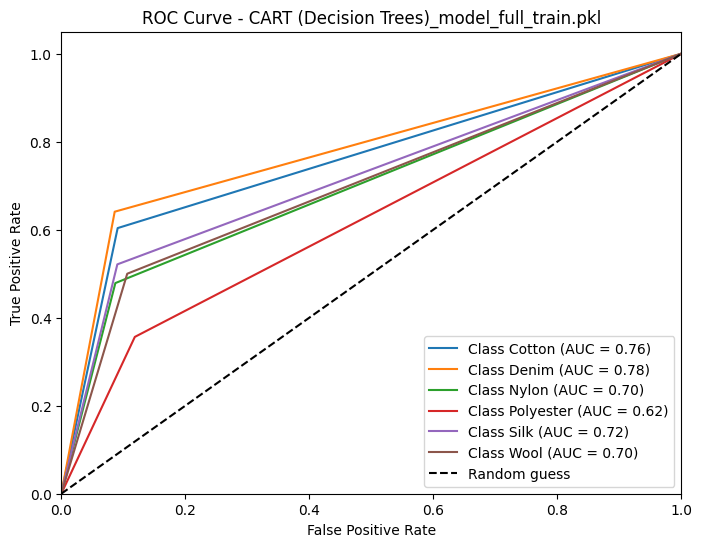

Baseline [Logistic Regression_model_full_train.pkl]
+ Accuracy = 0.791
+ Precision = 0.790
+ Recall = 0.791
+ F1-score = 0.789
+ AUC = 0.962



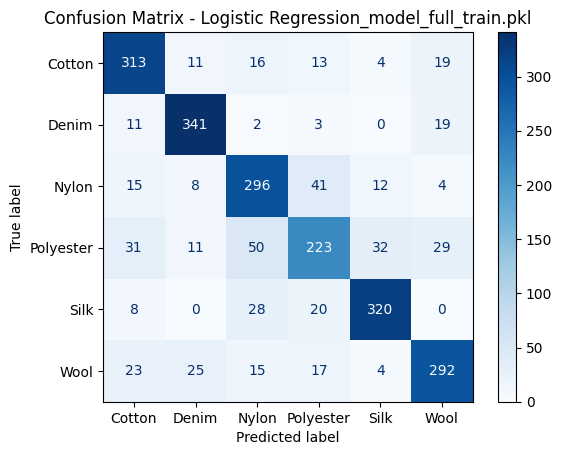

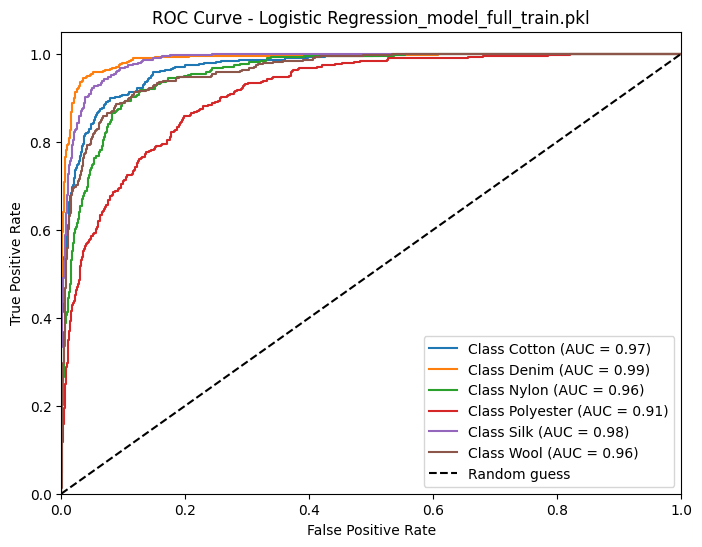

Baseline [LDA_model_full_train.pkl]
+ Accuracy = 0.825
+ Precision = 0.827
+ Recall = 0.825
+ F1-score = 0.826
+ AUC = 0.971



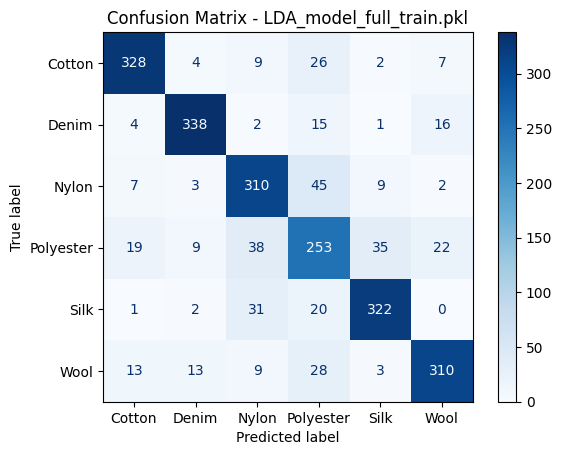

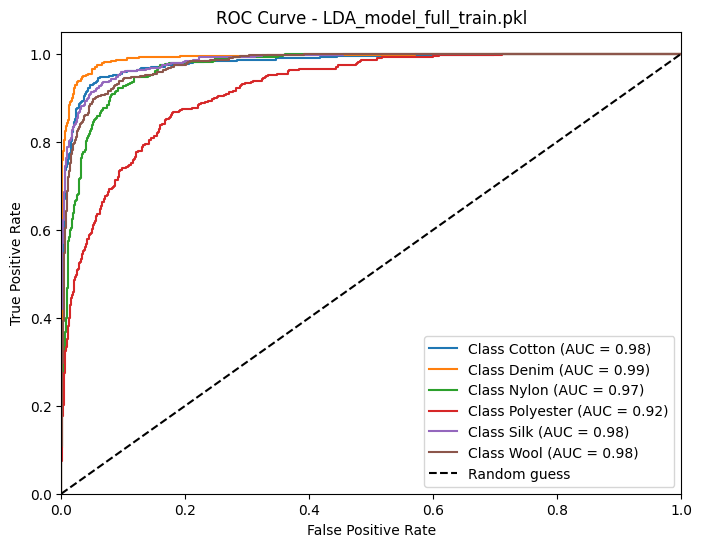

Baseline [kNN_model_full_train.pkl]
+ Accuracy = 0.749
+ Precision = 0.751
+ Recall = 0.749
+ F1-score = 0.747
+ AUC = 0.938



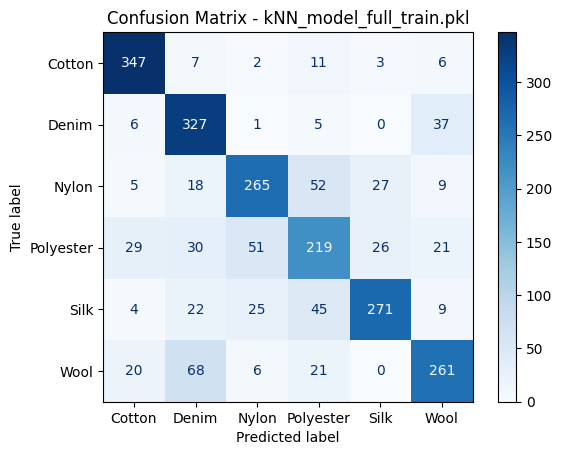

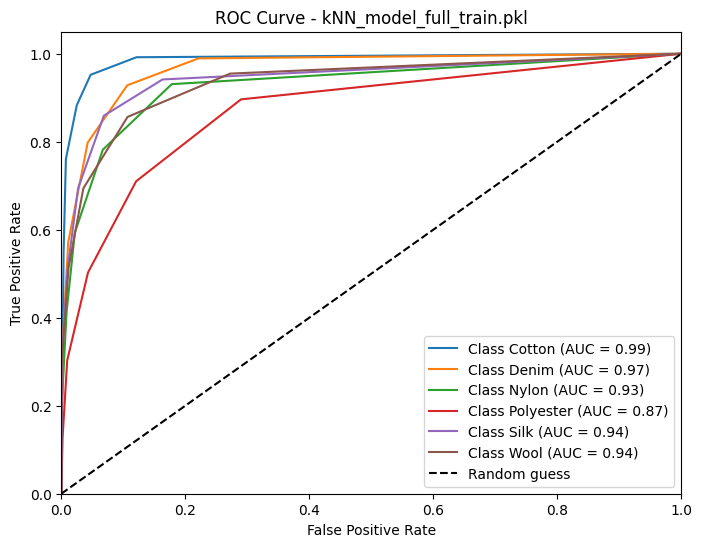

In [26]:
import os
import joblib
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Giả sử nhãn lớp được định nghĩa như sau
class_labels = ['Cotton', 'Denim', 'Nylon', 'Polyester', 'Silk', 'Wool']

# Binarize the labels for multi-class ROC AUC
y_val_bin = label_binarize(y_val, classes=range(len(class_labels)))

# Vòng lặp đánh giá mô hình
for model_name, model_clf in models.items():
    # Dự đoán xác suất trên tập validation
    y_pred_val_prob = model_clf.predict_proba(X_val)
    # Dự đoán lớp
    y_pred_val = model_clf.predict(X_val)

    # Tính toán các chỉ số
    val_acc = accuracy_score(y_val, y_pred_val)
    val_precision = precision_score(y_val, y_pred_val, average='weighted')
    val_recall = recall_score(y_val, y_pred_val, average='weighted')
    val_f1 = f1_score(y_val, y_pred_val, average='weighted')
    val_auc = roc_auc_score(y_val_bin, y_pred_val_prob, average='weighted', multi_class='ovr')

    # In thông tin kết quả
    print(f'Baseline [{model_name}]')
    print(f'+ Accuracy = {val_acc:.3f}')
    print(f'+ Precision = {val_precision:.3f}')
    print(f'+ Recall = {val_recall:.3f}')
    print(f'+ F1-score = {val_f1:.3f}')
    print(f'+ AUC = {val_auc:.3f}')
    print()

    # Vẽ confusion matrix
    cm = confusion_matrix(y_val, y_pred_val)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Vẽ ROC cho từng lớp
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_pred_val_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

Baseline [XGBoost_model_full_train.pkl]
+ Accuracy = 0.807
+ Precision = 0.817
+ Recall = 0.807
+ F1-score = 0.808
+ AUC = 0.950



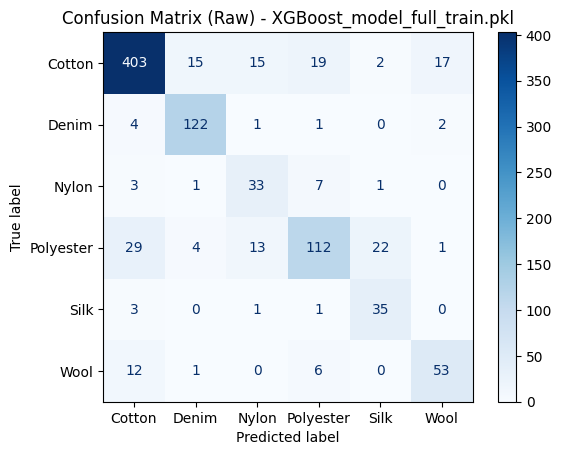

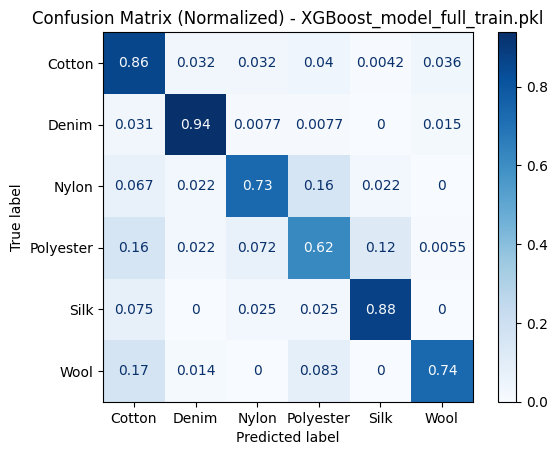

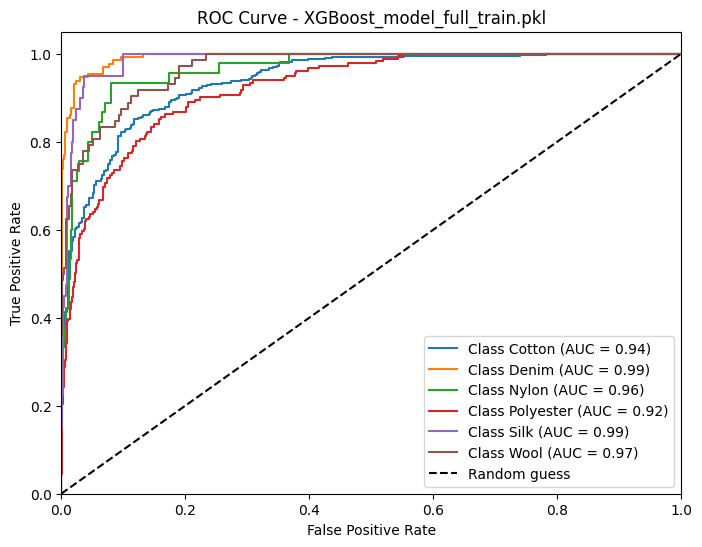

Baseline [LightGBM_model_full_train.pkl]
+ Accuracy = 0.784
+ Precision = 0.794
+ Recall = 0.784
+ F1-score = 0.784
+ AUC = 0.945



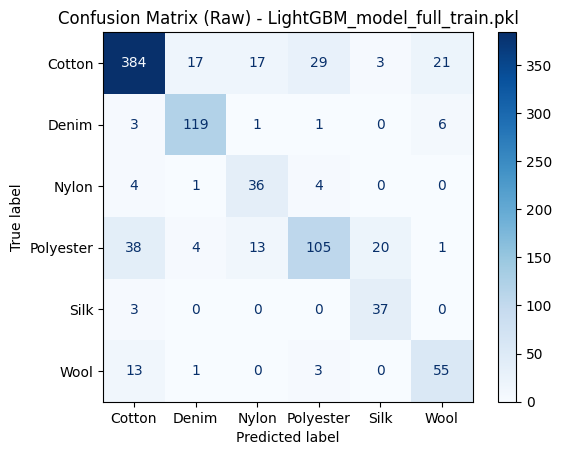

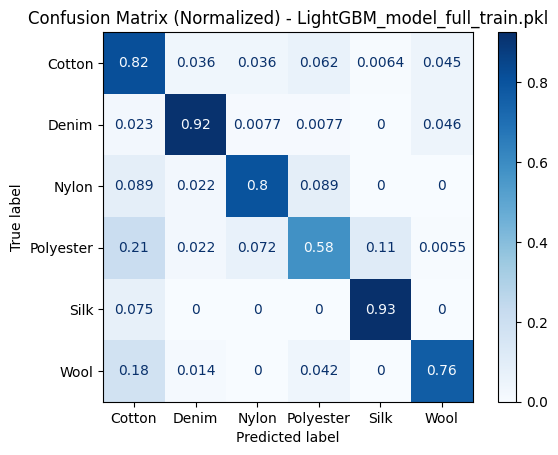

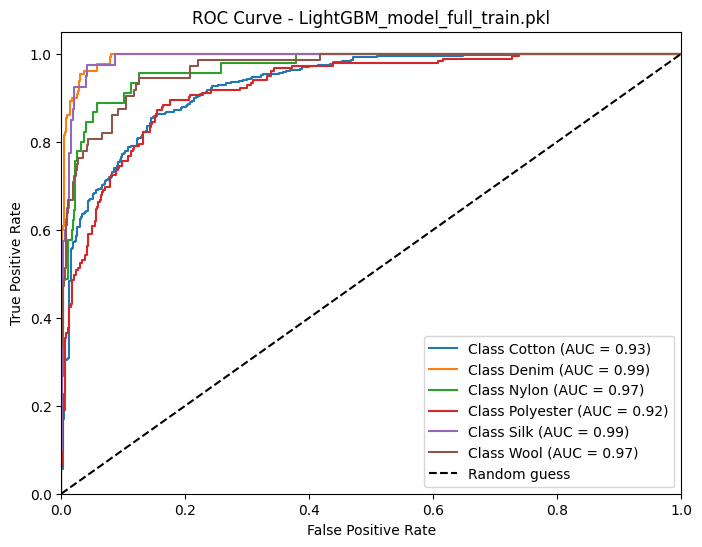

Baseline [Random Forest_model_full_train.pkl]
+ Accuracy = 0.687
+ Precision = 0.715
+ Recall = 0.687
+ F1-score = 0.690
+ AUC = 0.866



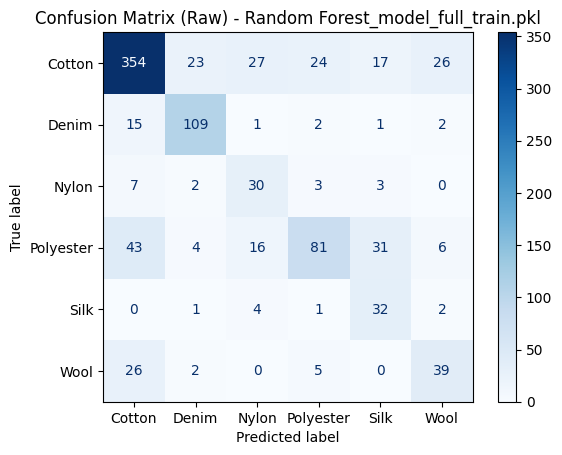

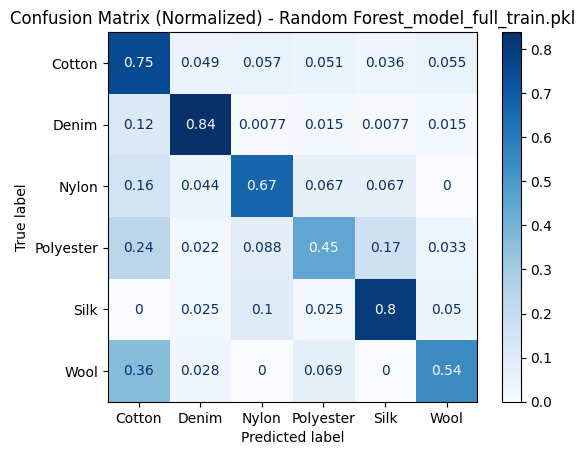

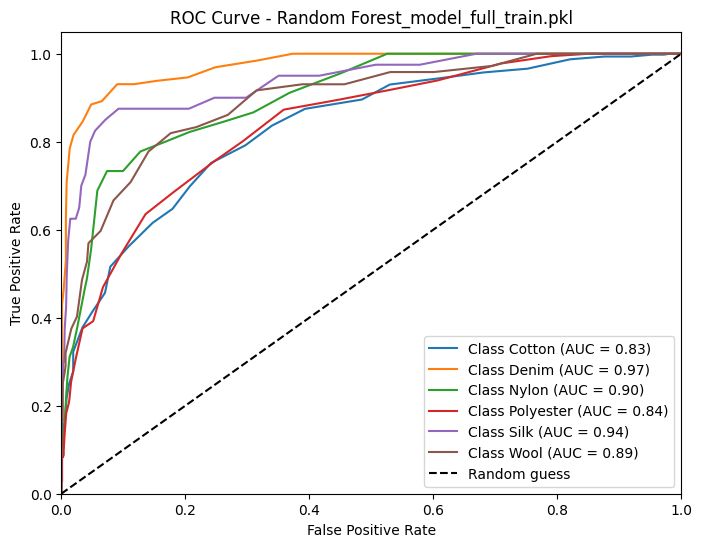

Baseline [AdaBoost_model_full_train.pkl]
+ Accuracy = 0.458
+ Precision = 0.545
+ Recall = 0.458
+ F1-score = 0.479
+ AUC = 0.654



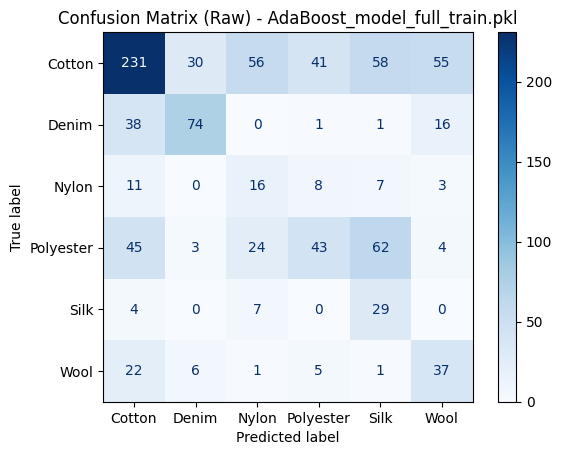

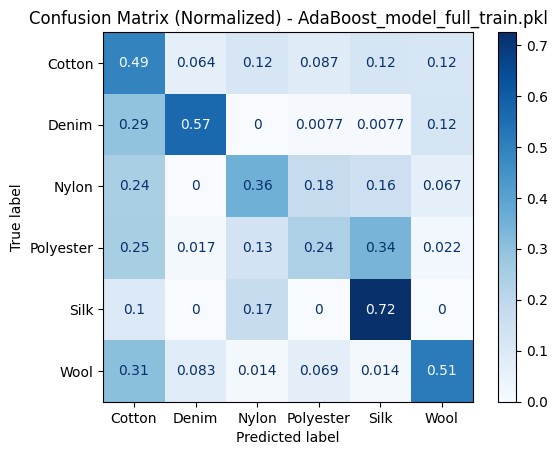

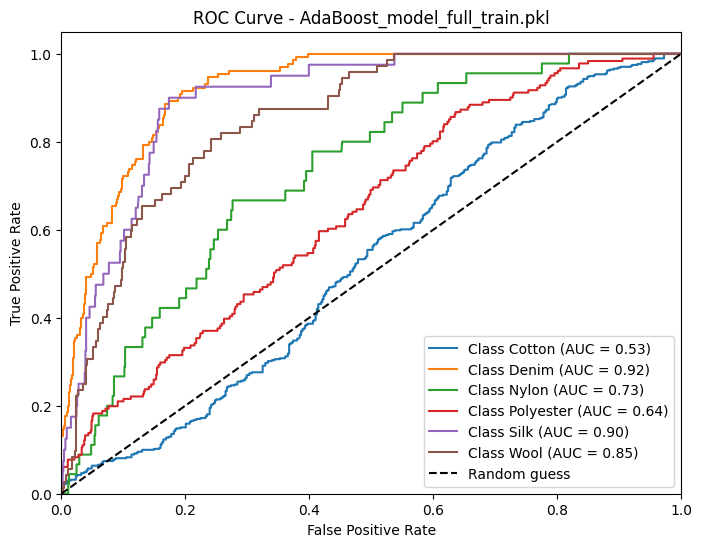

Baseline [MLP_model_full_train.pkl]
+ Accuracy = 0.839
+ Precision = 0.845
+ Recall = 0.839
+ F1-score = 0.841
+ AUC = 0.961



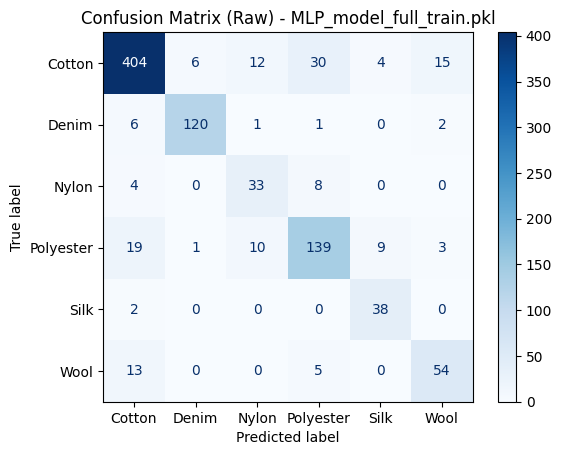

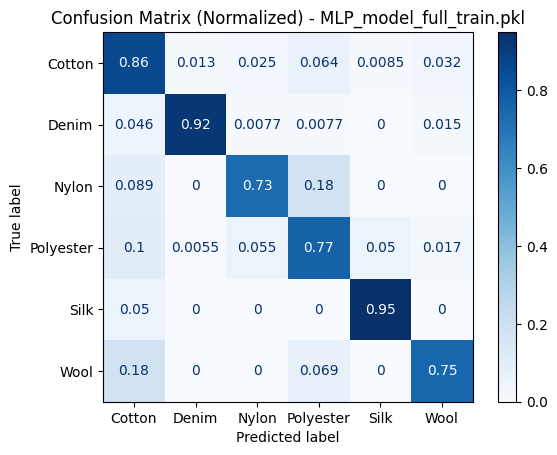

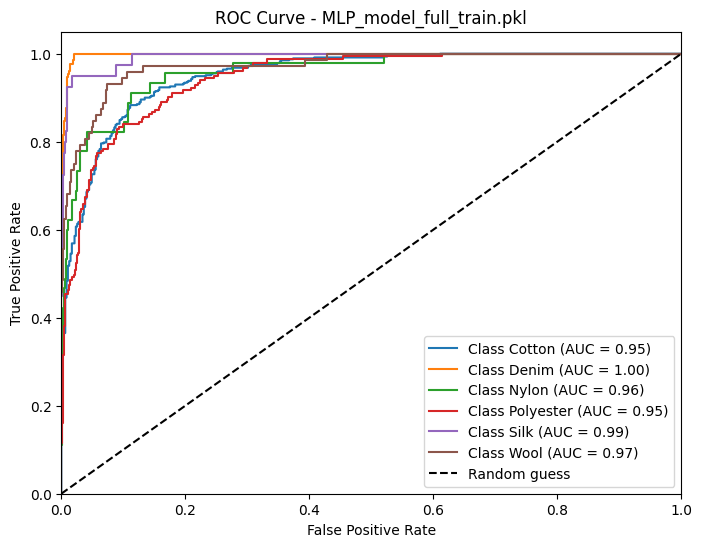

Baseline [SVM_model_full_train.pkl]
+ Accuracy = 0.864
+ Precision = 0.868
+ Recall = 0.864
+ F1-score = 0.864
+ AUC = 0.971



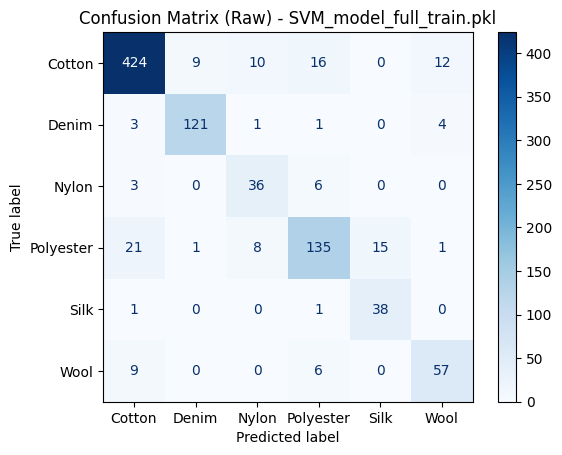

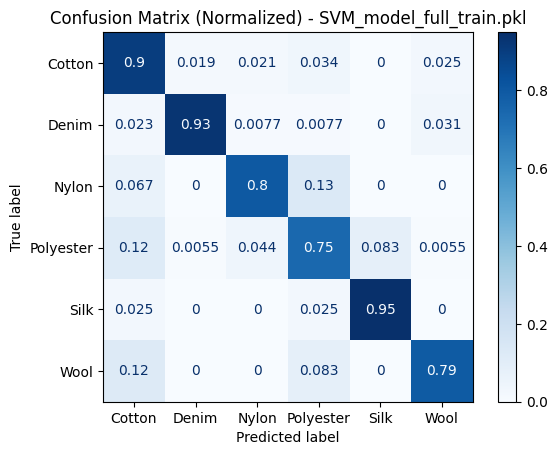

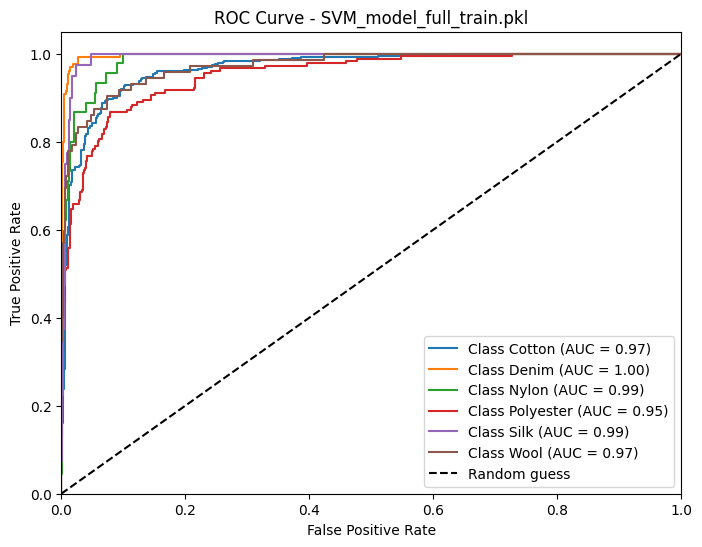

Baseline [CART (Decision Trees)_model_full_train.pkl]
+ Accuracy = 0.520
+ Precision = 0.588
+ Recall = 0.520
+ F1-score = 0.538
+ AUC = 0.690



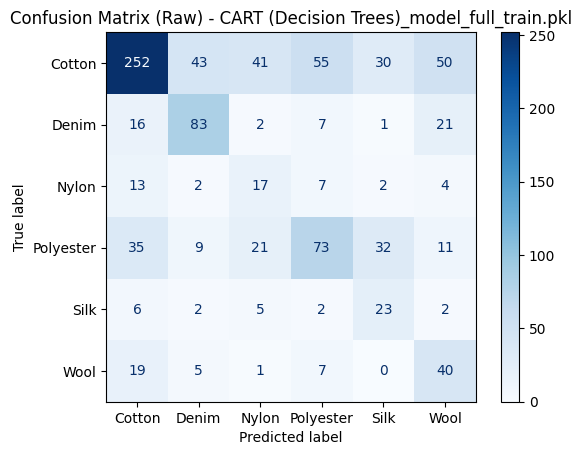

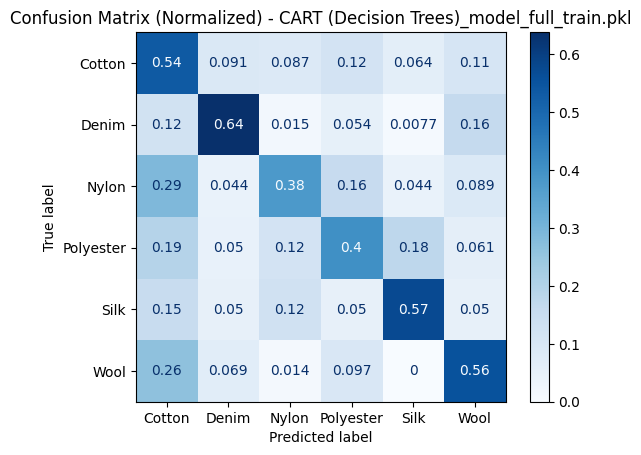

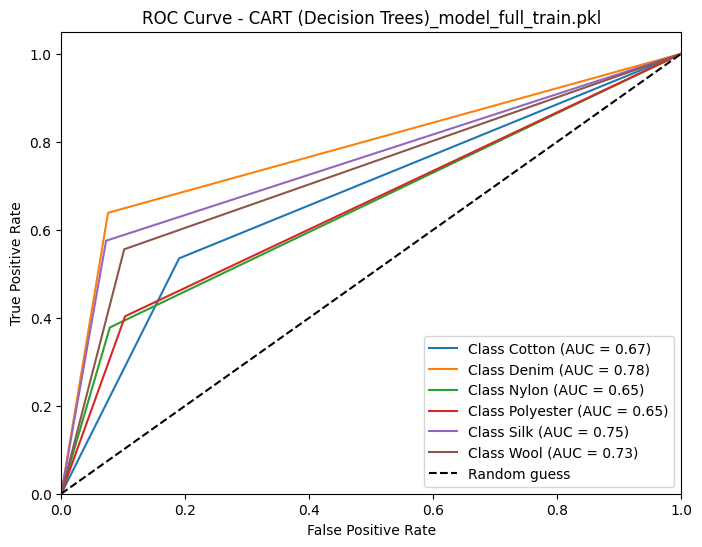

Baseline [Logistic Regression_model_full_train.pkl]
+ Accuracy = 0.766
+ Precision = 0.784
+ Recall = 0.766
+ F1-score = 0.770
+ AUC = 0.927



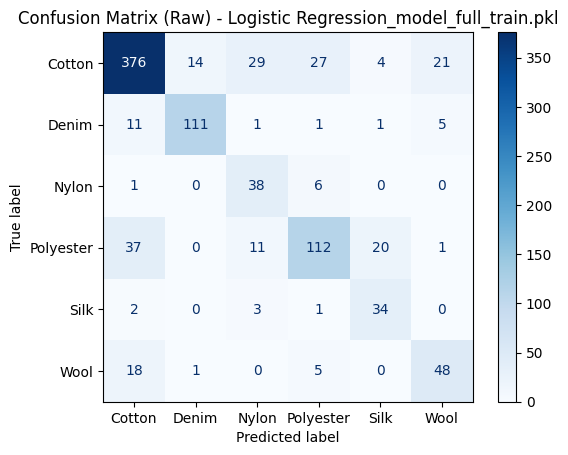

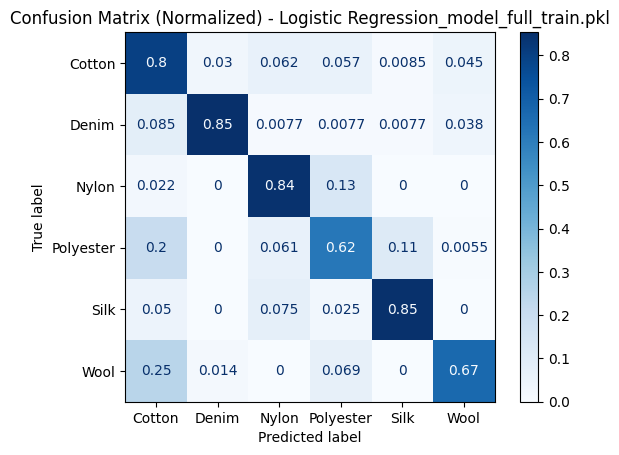

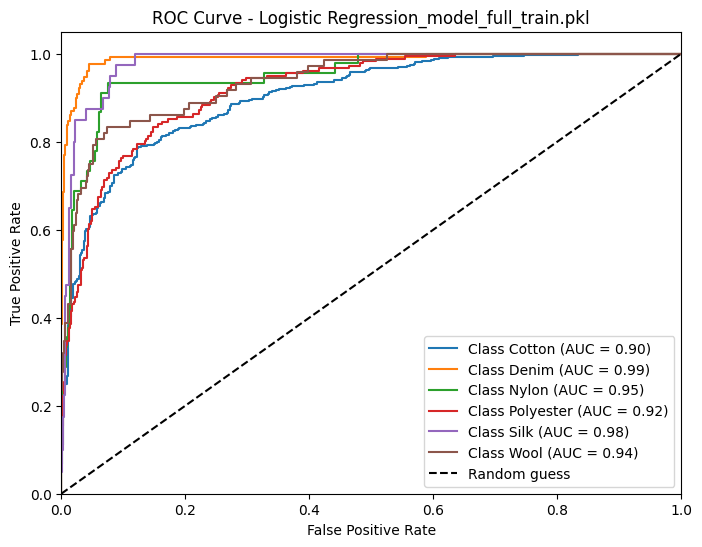

Baseline [LDA_model_full_train.pkl]
+ Accuracy = 0.823
+ Precision = 0.837
+ Recall = 0.823
+ F1-score = 0.827
+ AUC = 0.958



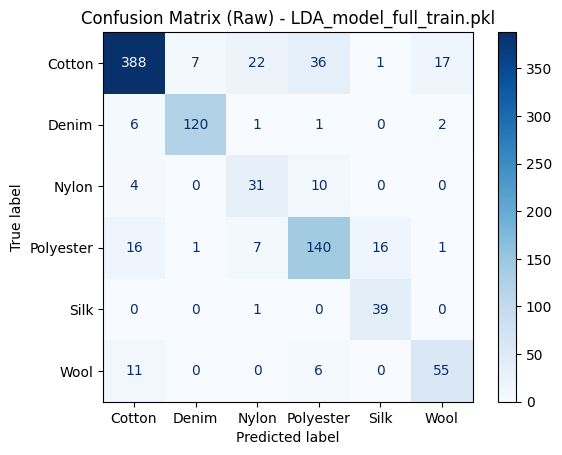

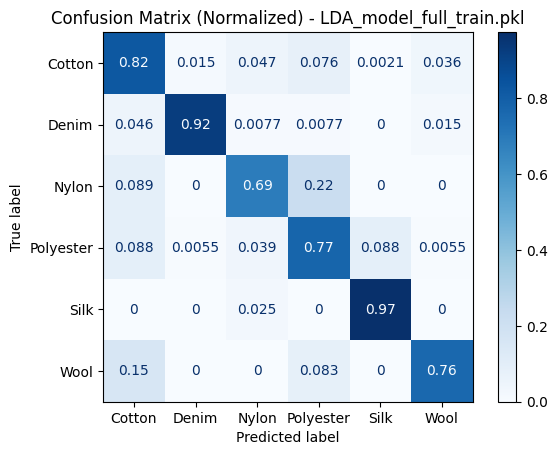

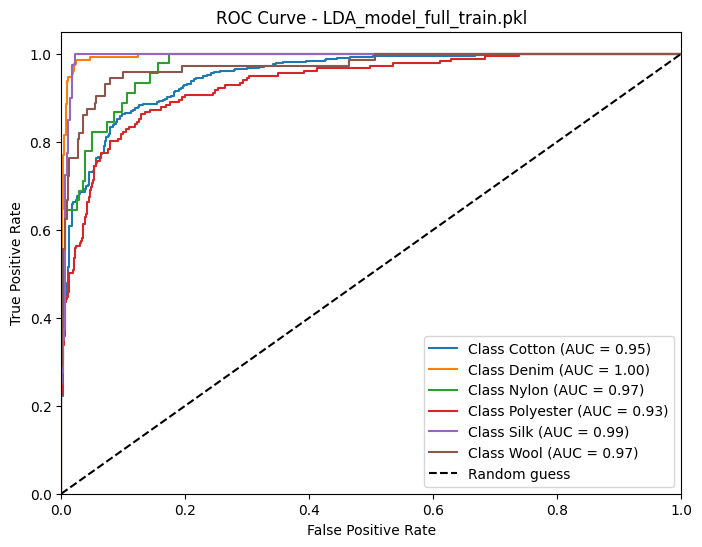

Baseline [kNN_model_full_train.pkl]
+ Accuracy = 0.823
+ Precision = 0.832
+ Recall = 0.823
+ F1-score = 0.824
+ AUC = 0.962



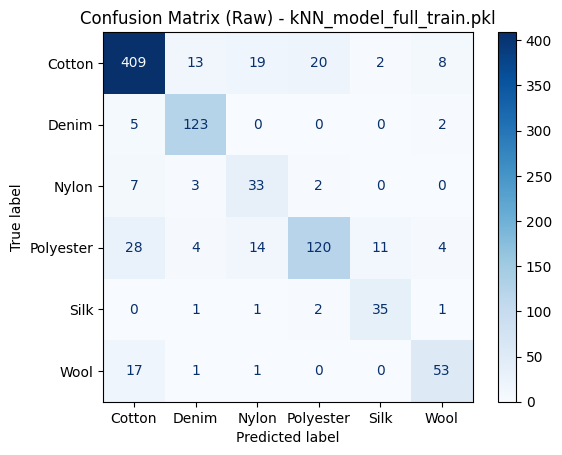

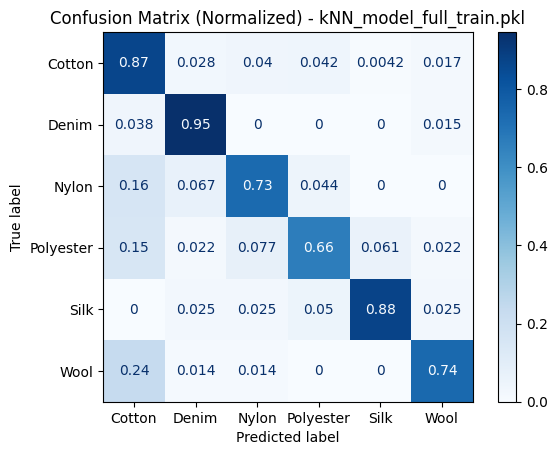

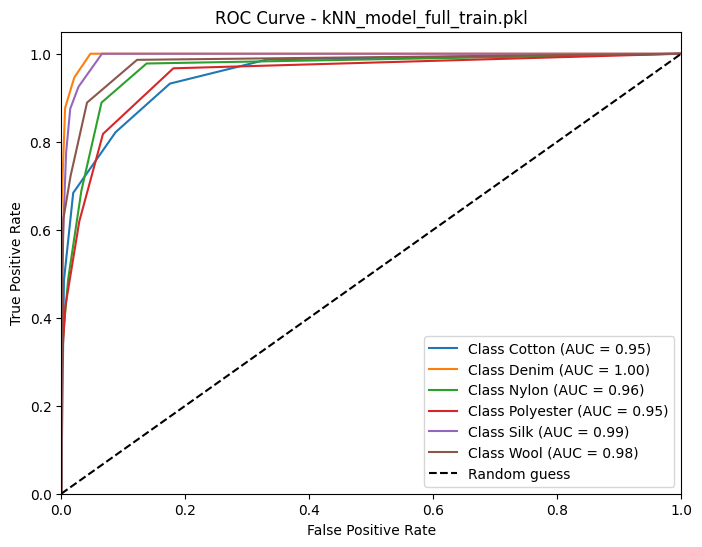

In [28]:
import os
import joblib
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Giả sử nhãn lớp được định nghĩa như sau
class_labels = ['Cotton', 'Denim', 'Nylon', 'Polyester', 'Silk', 'Wool']

# Binarize the labels for multi-class ROC AUC
y_test_bin = label_binarize(y_test, classes=range(len(class_labels)))

# Vòng lặp đánh giá mô hình
for model_name, model_clf in models.items():
    # Dự đoán xác suất trên tập kiểm tra
    y_pred_test_prob = model_clf.predict_proba(X_test)
    # Dự đoán lớp
    y_pred_test = model_clf.predict(X_test)

    # Tính toán các chỉ số
    test_acc = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    test_auc = roc_auc_score(y_test_bin, y_pred_test_prob, average='weighted', multi_class='ovr')

    # In thông tin kết quả
    print(f'Baseline [{model_name}]')
    print(f'+ Accuracy = {test_acc:.3f}')
    print(f'+ Precision = {test_precision:.3f}')
    print(f'+ Recall = {test_recall:.3f}')
    print(f'+ F1-score = {test_f1:.3f}')
    print(f'+ AUC = {test_auc:.3f}')
    print()

    # Vẽ confusion matrix không chuẩn hóa
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix (Raw) - {model_name}')
    plt.show()

    # Vẽ confusion matrix với chuẩn hóa
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=class_labels)
    disp_normalized.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix (Normalized) - {model_name}')
    plt.show()

    # Vẽ ROC cho từng lớp
    plt.figure(figsize=(8, 6))
    for i in range(len(class_labels)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_test_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
